<a href="https://colab.research.google.com/github/EASWAR17/basic-nn-model/blob/main/dl_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import auth
import gspread
from google.auth import default

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [3]:
worksheet = gc.open('dl_ex1').sheet1
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])

In [4]:
df

,Input,Output
0,1,17
1,2,34
2,3,51
3,4,68
4,5,85
5,6,102
6,7,119
7,8,136
8,9,153
9,10,170


In [5]:
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,17.0
1,2.0,34.0
2,3.0,51.0
3,4.0,68.0
4,5.0,85.0


In [6]:
X = df[['Input']].values
y = df[['Output']].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.]])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()

In [8]:
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [9]:
X_train1

array([[0.16666667],
       [0.75      ],
       [0.66666667],
       [0.33333333],
       [0.08333333],
       [0.83333333],
       [0.58333333],
       [1.        ],
       [0.        ],
       [0.5       ],
       [0.41666667]])

In [10]:
ai=Sequential([
    Dense(3,activation='relu'),
    Dense(17,activation='relu'),
    Dense(1)])

In [13]:
ai.compile(optimizer='rmsprop',loss='mse')
ai.fit(X_train1,y_train,epochs=1000)
ai.fit(X_train1,y_train,epochs=1000)


Epoch 1/1000
1/1 [==============================] - 0s 488ms/step - loss: 12189.9902
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 12106.8809
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 12046.4971
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 11995.8867
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 11950.9229
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 11909.6895
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 11871.1182
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 11834.5459
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 11799.5244
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 11765.7412
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 11732.9619
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 11701

<Axes: >

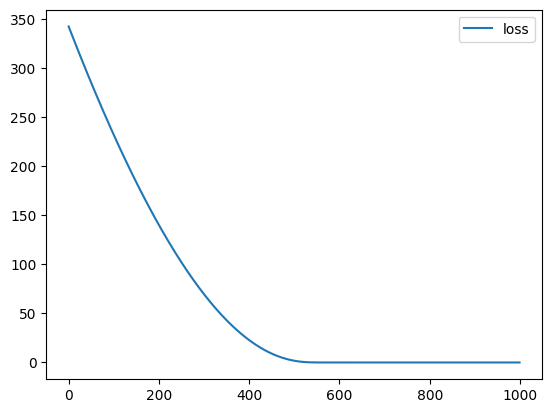

In [14]:
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()

In [15]:
X_test1 = Scaler.transform(X_test)
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 149ms/step - loss: 0.0241


0.02410161681473255

In [17]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)


In [18]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 29ms/step


array([[509.63345]], dtype=float32)

In [19]:
z = [[19]]


In [22]:
z1=Scaler.transform(z)

In [23]:
ai.predict(z1)

1/1 [==============================] - 0s 30ms/step


array([[322.7563]], dtype=float32)